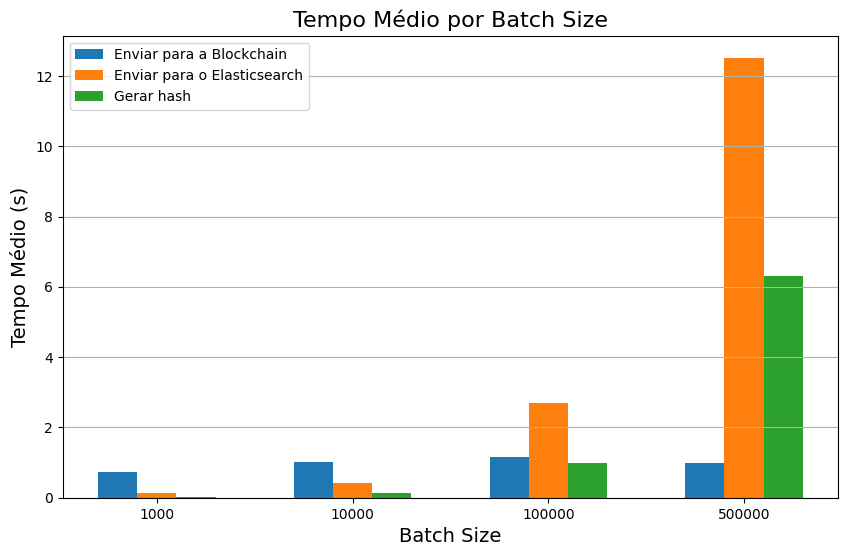

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./latencia.csv")

# Convertendo os tempos para segundos
def convert_to_seconds(time_str):
    if 'ms' in time_str:
        return float(time_str.replace('ms', '')) / 1000
    elif 's' in time_str:
        return float(time_str.replace('s', ''))
    else:
        return float(time_str)

df['Tempo'] = df['Tempo'].apply(convert_to_seconds)

# Agrupando por Batch Size e Processo, e calculando a média dos tempos
grouped_df = df.groupby(['Batch Size', 'Processo'])['Tempo'].mean().reset_index()

# Função para plotar o gráfico de barras
def plot_bar_chart(df):
    # Obtendo os batch sizes e processos únicos
    batch_sizes = df['Batch Size'].unique()
    processos = df['Processo'].unique()

    # Definindo a largura das barras
    bar_width = 0.2
    x = np.arange(len(batch_sizes))  # Posições no eixo X

    # Criando o gráfico
    plt.figure(figsize=(10, 6))

    # Plotando as barras para cada processo
    for i, processo in enumerate(processos):
        tempos = df[df['Processo'] == processo]['Tempo']
        plt.bar(x + i * bar_width, tempos, width=bar_width, label=processo)

    # Configurações do gráfico
    plt.title('Tempo Médio por Batch Size', fontsize=16)
    plt.xlabel('Batch Size', fontsize=14)
    plt.ylabel('Tempo Médio (s)', fontsize=14)
    plt.xticks(x + bar_width, batch_sizes)  # Rótulos do eixo X
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Gerando o gráfico de barras
plot_bar_chart(grouped_df)

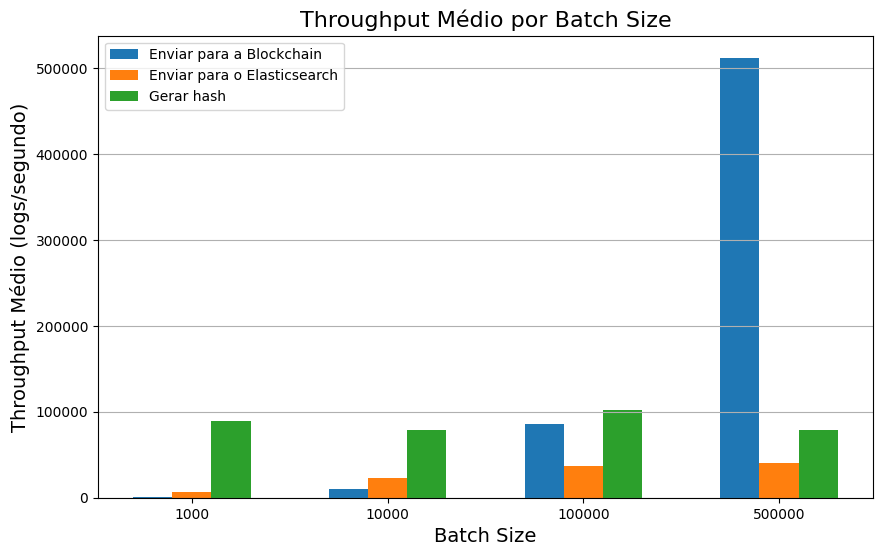

In [16]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./latencia.csv")

# Convertendo os tempos para segundos
def convert_to_seconds(time_str):
    if 'ms' in time_str:
        return float(time_str.replace('ms', '')) / 1000
    elif 's' in time_str:
        return float(time_str.replace('s', ''))
    else:
        return float(time_str)

df['Tempo'] = df['Tempo'].apply(convert_to_seconds)

# Agrupando por Batch Size e Processo, e calculando a média dos tempos
grouped_df = df.groupby(['Batch Size', 'Processo'])['Tempo'].mean().reset_index()

# Calculando o throughput médio
grouped_df['Throughput'] = grouped_df['Batch Size'] / grouped_df['Tempo']

# Função para plotar o gráfico de barras de throughput médio
def plot_throughput_bar_chart(df):
    # Obtendo os batch sizes e processos únicos
    batch_sizes = df['Batch Size'].unique()
    processos = df['Processo'].unique()

    # Definindo a largura das barras
    bar_width = 0.2
    x = np.arange(len(batch_sizes))  # Posições no eixo X

    # Criando o gráfico
    plt.figure(figsize=(10, 6))

    # Plotando as barras para cada processo
    for i, processo in enumerate(processos):
        throughput = df[df['Processo'] == processo]['Throughput']
        plt.bar(x + i * bar_width, throughput, width=bar_width, label=processo)

    # Configurações do gráfico
    plt.title('Throughput Médio por Batch Size', fontsize=16)
    plt.xlabel('Batch Size', fontsize=14)
    plt.ylabel('Throughput Médio (logs/segundo)', fontsize=14)
    plt.xticks(x + bar_width, batch_sizes)  # Rótulos do eixo X
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Gerando o gráfico de barras de throughput médio
plot_throughput_bar_chart(grouped_df)